# Business Understanding

Precision important bc false positives bad


# Data Understanding



# Data Preparation

In [79]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, roc_curve, auc
from sklearn.feature_selection import (VarianceThreshold, SelectKBest, f_regression, mutual_info_regression, 
    RFE, RFECV)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression


%matplotlib inline

Read in the data

In [8]:
df = pd.read_csv('data/weather_prediction_dataset.csv')
df.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  20000101      1                  8            0.89          1.0286   
1  20000102      1                  8            0.87          1.0318   
2  20000103      1                  5            0.81          1.0314   
3  20000104      1                  7            0.79          1.0262   
4  20000105      1                  5            0.90          1.0246   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.20                 0.03             0.0   
1                    0.25                 0.00             0.0   
2                    0.50                 0.00             3.7   
3                    0.63                 0.35             6.9   
4                    0.51                 0.07             3.7   

   BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_min  \
0              2.9             1.6  ...                -9.3   
1              3.6             2.7  ...                 0.5   
2              2.2             0.1  ...                -1.0   
3              3.9             0.5  ...                 2.5   
4              6.0             3.8  ...                -1.8   

   STOCKHOLM_temp_max  TOURS_wind_speed  TOURS_humidity  TOURS_pressure  \
0                 0.7               1.6            0.97          1.0275   
1                 2.0               2.0            0.99          1.0293   
2                 2.8               3.4            0.91          1.0267   
3                 4.6               4.9            0.95          1.0222   
4                 2.9               3.6            0.95          1.0209   

   TOURS_global_radiation  TOURS_precipitation  TOURS_temp_mean  \
0                    0.25                 0.04              8.5   
1                    0.17                 0.16              7.9   
2                    0.27                 0.00              8.1   
3                    0.11                 0.44              8.6   
4                    0.39                 0.04              8.0   

   TOURS_temp_min  TOURS_temp_max  
0             7.2             9.8  
1             6.6             9.2  
2             6.6             9.6  
3             6.4            10.8  
4             6.4             9.5  

[5 rows x 165 columns]

In [7]:
df_labels = pd.read_csv('data/weather_prediction_bbq_labels.csv')
df_labels.head()

DATE  BASEL_BBQ_weather  BUDAPEST_BBQ_weather  DE_BBQ_weather  \
0  20000101              False                 False           False   
1  20000102              False                 False           False   
2  20000103              False                 False           False   
3  20000104              False                 False           False   
4  20000105              False                 False           False   

   DRESDEN_BBQ_weather  DUSSELDORF_BBQ_weather  HEATHROW_BBQ_weather  \
0                False                   False                 False   
1                False                   False                 False   
2                False                   False                 False   
3                False                   False                 False   
4                False                   False                 False   

   KASSEL_BBQ_weather  LJUBLJANA_BBQ_weather  MAASTRICHT_BBQ_weather  \
0               False                  False                   False   
1               False                  False                   False   
2               False                  False                   False   
3               False                  False                   False   
4               False                  False                   False   

   MALMO_BBQ_weather  MONTELIMAR_BBQ_weather  MUENCHEN_BBQ_weather  \
0              False                   False                 False   
1              False                   False                 False   
2              False                   False                 False   
3              False                   False                 False   
4              False                   False                 False   

   OSLO_BBQ_weather  PERPIGNAN_BBQ_weather  SONNBLICK_BBQ_weather  \
0             False                  False                  False   
1             False                  False                  False   
2             False                  False                  False   
3             False                  False                  False   
4             False                  False                  False   

   STOCKHOLM_BBQ_weather  TOURS_BBQ_weather  
0                  False              False  
1                  False              False  
2                  False              False  
3                  False              False  
4                  False              False

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Columns: 165 entries, DATE to TOURS_temp_max
dtypes: float64(150), int64(15)
memory usage: 4.6 MB


165 columns, 3,653 rows

In [10]:
df_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   DATE                    3654 non-null   int64
 1   BASEL_BBQ_weather       3654 non-null   bool 
 2   BUDAPEST_BBQ_weather    3654 non-null   bool 
 3   DE_BBQ_weather          3654 non-null   bool 
 4   DRESDEN_BBQ_weather     3654 non-null   bool 
 5   DUSSELDORF_BBQ_weather  3654 non-null   bool 
 6   HEATHROW_BBQ_weather    3654 non-null   bool 
 7   KASSEL_BBQ_weather      3654 non-null   bool 
 8   LJUBLJANA_BBQ_weather   3654 non-null   bool 
 9   MAASTRICHT_BBQ_weather  3654 non-null   bool 
 10  MALMO_BBQ_weather       3654 non-null   bool 
 11  MONTELIMAR_BBQ_weather  3654 non-null   bool 
 12  MUENCHEN_BBQ_weather    3654 non-null   bool 
 13  OSLO_BBQ_weather        3654 non-null   bool 
 14  PERPIGNAN_BBQ_weather   3654 non-null   bool 
 15  SONNBLICK_BBQ_weather

I will be looking at Heathrow bbq weather

In [12]:
list(df.columns)

['DATE',
 'MONTH',
 'BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_max',
 'DE_BILT_cloud_cover',
 'DE_BILT_wind_speed',
 'DE_BILT_wind_gust',
 'DE_BILT_humidity',
 'DE_BILT_pressure',
 'DE_BILT_global_radiation',
 'DE_BILT_precipitation',
 'DE_BILT_sunshine',
 'DE_BILT_temp_mean',
 'DE_BILT_temp_min',
 'DE_BILT_temp_max',
 'DRESDEN_cloud_cover',
 'DRESDEN_wind_speed',
 'DRESDEN_wind_gust',
 'DRESDEN_humidity',
 'DRESDEN_global_radiation',
 'DRESDEN_precipitation',
 'DRESDEN_sunshine',
 'DRESDEN_temp_mean',
 'DRESDEN_temp_min',
 'DRESDEN_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_wind_gust',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pres

I am interested in the columns containing data for Heathrow.

In [18]:
df_heathrow = df[['DATE', 'MONTH', 'HEATHROW_cloud_cover', 'HEATHROW_humidity', 'HEATHROW_pressure',
                 'HEATHROW_global_radiation', 'HEATHROW_precipitation', 'HEATHROW_sunshine', 'HEATHROW_temp_mean',
                 'HEATHROW_temp_min', 'HEATHROW_temp_max']]

df_heathrow.head()

DATE  MONTH  HEATHROW_cloud_cover  HEATHROW_humidity  \
0  20000101      1                     7               0.94   
1  20000102      1                     7               0.89   
2  20000103      1                     8               0.91   
3  20000104      1                     5               0.89   
4  20000105      1                     5               0.85   

   HEATHROW_pressure  HEATHROW_global_radiation  HEATHROW_precipitation  \
0             1.0245                       0.18                    0.00   
1             1.0253                       0.20                    0.02   
2             1.0186                       0.13                    0.60   
3             1.0148                       0.34                    0.02   
4             1.0142                       0.25                    0.08   

   HEATHROW_sunshine  HEATHROW_temp_mean  HEATHROW_temp_min  HEATHROW_temp_max  
0                0.4                 7.0                4.9               10.8  
1                0.7                 7.9                5.0               11.5  
2                0.0                 9.4                7.2                9.5  
3                2.9                 7.0                4.4               11.0  
4                1.3                 6.4                1.9               10.8

In [19]:
df_heathrow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DATE                       3654 non-null   int64  
 1   MONTH                      3654 non-null   int64  
 2   HEATHROW_cloud_cover       3654 non-null   int64  
 3   HEATHROW_humidity          3654 non-null   float64
 4   HEATHROW_pressure          3654 non-null   float64
 5   HEATHROW_global_radiation  3654 non-null   float64
 6   HEATHROW_precipitation     3654 non-null   float64
 7   HEATHROW_sunshine          3654 non-null   float64
 8   HEATHROW_temp_mean         3654 non-null   float64
 9   HEATHROW_temp_min          3654 non-null   float64
 10  HEATHROW_temp_max          3654 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 314.1 KB


In [21]:
df_heathrow.describe()

DATE        MONTH  HEATHROW_cloud_cover  HEATHROW_humidity  \
count  3.654000e+03  3654.000000           3654.000000        3654.000000   
mean   2.004568e+07     6.520799              5.272031           0.758358   
std    2.874287e+04     3.450083              2.011846           0.102410   
min    2.000010e+07     1.000000              0.000000           0.420000   
25%    2.002070e+07     4.000000              4.000000           0.690000   
50%    2.004567e+07     7.000000              6.000000           0.760000   
75%    2.007070e+07    10.000000              7.000000           0.840000   
max    2.010010e+07    12.000000              8.000000           1.000000   

       HEATHROW_pressure  HEATHROW_global_radiation  HEATHROW_precipitation  \
count        3654.000000                3654.000000             3654.000000   
mean            1.015192                   1.196970                0.178279   
std             0.010561                   0.881638                0.367572   
min             0.971500                   0.120000                0.000000   
25%             1.009000                   0.430000                0.000000   
50%             1.016000                   0.960000                0.020000   
75%             1.022100                   1.860000                0.180000   
max             1.043800                   3.490000                3.660000   

       HEATHROW_sunshine  HEATHROW_temp_mean  HEATHROW_temp_min  \
count        3654.000000         3654.000000        3654.000000   
mean            4.433498           11.822386           8.002737   
std             3.982646            5.610018           5.230449   
min             0.000000           -2.200000          -6.800000   
25%             0.600000            7.600000           4.100000   
50%             3.700000           11.700000           8.250000   
75%             7.200000           16.300000          12.100000   
max            15.500000           29.000000          20.600000   

       HEATHROW_temp_max  
count        3654.000000  
mean           15.637438  
std             6.385440  
min             0.200000  
25%            10.800000  
50%            15.400000  
75%            20.500000  
max            37.900000

I will change month column to month name.

In [94]:
month_labels = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August',
                9: 'September', 10: 'October', 11: 'November', 12: 'December'}


#df_heathrow['MONTH'] = df['DATE'].dt.month
df_heathrow['MONTH'].replace(month_labels, inplace=True)
df_heathrow

C:\Users\lalyn\AppData\Local\Temp\ipykernel_12680\403625945.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heathrow['MONTH'].replace(month_labels, inplace=True)


DATE     MONTH  HEATHROW_cloud_cover  HEATHROW_humidity  \
0     20000101   January                     7               0.94   
1     20000102   January                     7               0.89   
2     20000103   January                     8               0.91   
3     20000104   January                     5               0.89   
4     20000105   January                     5               0.85   
...        ...       ...                   ...                ...   
3649  20091228  December                     2               0.90   
3650  20091229  December                     8               0.92   
3651  20091230  December                     8               0.97   
3652  20091231  December                     7               0.83   
3653  20100101   January                     2               0.77   

      HEATHROW_pressure  HEATHROW_global_radiation  HEATHROW_precipitation  \
0                1.0245                       0.18                    0.00   
1                1.0253                       0.20                    0.02   
2                1.0186                       0.13                    0.60   
3                1.0148                       0.34                    0.02   
4                1.0142                       0.25                    0.08   
...                 ...                        ...                     ...   
3649             1.0043                       0.37                    0.06   
3650             0.9949                       0.12                    1.28   
3651             0.9923                       0.12                    0.36   
3652             0.9993                       0.13                    0.00   
3653             1.0056                       0.49                    0.00   

      HEATHROW_sunshine  HEATHROW_temp_mean  HEATHROW_temp_min  \
0                   0.4                 7.0                4.9   
1                   0.7                 7.9                5.0   
2                   0.0                 9.4                7.2   
3                   2.9                 7.0                4.4   
4                   1.3                 6.4                1.9   
...                 ...                 ...                ...   
3649                3.7                 1.7               -2.2   
3650                0.0                 1.9               -1.2   
3651                0.0                 4.6                4.0   
3652                0.0                 3.9                3.3   
3653                6.4                 1.6               -0.5   

      HEATHROW_temp_max  
0                  10.8  
1                  11.5  
2                   9.5  
3                  11.0  
4                  10.8  
...                 ...  
3649                5.0  
3650                5.2  
3651                4.4  
3652                3.6  
3653                5.0  

[3654 rows x 11 columns]

In [95]:
df_heathrow['MONTH'].value_counts()

January      311
March        310
May          310
July         310
August       310
October      310
December     310
April        300
June         300
September    300
November     300
February     283
Name: MONTH, dtype: int64

In [138]:
#check for null values
df_heathrow.isnull().sum()

DATE                         0
HEATHROW_cloud_cover         0
HEATHROW_humidity            0
HEATHROW_pressure            0
HEATHROW_global_radiation    0
HEATHROW_precipitation       0
HEATHROW_sunshine            0
HEATHROW_temp_mean           0
HEATHROW_temp_min            0
HEATHROW_temp_max            0
MONTH_April                  0
MONTH_August                 0
MONTH_December               0
MONTH_February               0
MONTH_January                0
MONTH_July                   0
MONTH_June                   0
MONTH_March                  0
MONTH_May                    0
MONTH_November               0
MONTH_October                0
MONTH_September              0
dtype: int64

No null values to deal with.

In [22]:
df_labels['HEATHROW_BBQ_weather'].value_counts()

False    2785
True      869
Name: HEATHROW_BBQ_weather, dtype: int64

Not significantly imbalanced dataset

In [139]:
# get dummy columns for month
df_heathrow = pd.get_dummies(df_heathrow)
df_heathrow.head()

DATE  HEATHROW_cloud_cover  HEATHROW_humidity  HEATHROW_pressure  \
0  20000101                     7               0.94             1.0245   
1  20000102                     7               0.89             1.0253   
2  20000103                     8               0.91             1.0186   
3  20000104                     5               0.89             1.0148   
4  20000105                     5               0.85             1.0142   

   HEATHROW_global_radiation  HEATHROW_precipitation  HEATHROW_sunshine  \
0                       0.18                    0.00                0.4   
1                       0.20                    0.02                0.7   
2                       0.13                    0.60                0.0   
3                       0.34                    0.02                2.9   
4                       0.25                    0.08                1.3   

   HEATHROW_temp_mean  HEATHROW_temp_min  HEATHROW_temp_max  ...  \
0                 7.0                4.9               10.8  ...   
1                 7.9                5.0               11.5  ...   
2                 9.4                7.2                9.5  ...   
3                 7.0                4.4               11.0  ...   
4                 6.4                1.9               10.8  ...   

   MONTH_December  MONTH_February  MONTH_January  MONTH_July  MONTH_June  \
0               0               0              1           0           0   
1               0               0              1           0           0   
2               0               0              1           0           0   
3               0               0              1           0           0   
4               0               0              1           0           0   

   MONTH_March  MONTH_May  MONTH_November  MONTH_October  MONTH_September  
0            0          0               0              0                0  
1            0          0               0              0                0  
2            0          0               0              0                0  
3            0          0               0              0                0  
4            0          0               0              0                0  

[5 rows x 22 columns]

In [134]:
df_heathrow.describe()

DATE  HEATHROW_cloud_cover  HEATHROW_humidity  \
count  3.654000e+03           3654.000000        3654.000000   
mean   2.004568e+07              5.272031           0.758358   
std    2.874287e+04              2.011846           0.102410   
min    2.000010e+07              0.000000           0.420000   
25%    2.002070e+07              4.000000           0.690000   
50%    2.004567e+07              6.000000           0.760000   
75%    2.007070e+07              7.000000           0.840000   
max    2.010010e+07              8.000000           1.000000   

       HEATHROW_pressure  HEATHROW_global_radiation  HEATHROW_precipitation  \
count        3654.000000                3654.000000             3654.000000   
mean            1.015192                   1.196970                0.178279   
std             0.010561                   0.881638                0.367572   
min             0.971500                   0.120000                0.000000   
25%             1.009000                   0.430000                0.000000   
50%             1.016000                   0.960000                0.020000   
75%             1.022100                   1.860000                0.180000   
max             1.043800                   3.490000                3.660000   

       HEATHROW_sunshine  HEATHROW_temp_mean  HEATHROW_temp_min  \
count        3654.000000         3654.000000        3654.000000   
mean            4.433498           11.822386           8.002737   
std             3.982646            5.610018           5.230449   
min             0.000000           -2.200000          -6.800000   
25%             0.600000            7.600000           4.100000   
50%             3.700000           11.700000           8.250000   
75%             7.200000           16.300000          12.100000   
max            15.500000           29.000000          20.600000   

       HEATHROW_temp_max  ...  MONTH_December  MONTH_February  MONTH_January  \
count        3654.000000  ...     3654.000000     3654.000000    3654.000000   
mean           15.637438  ...        0.084839        0.077449       0.085112   
std             6.385440  ...        0.278679        0.267340       0.279087   
min             0.200000  ...        0.000000        0.000000       0.000000   
25%            10.800000  ...        0.000000        0.000000       0.000000   
50%            15.400000  ...        0.000000        0.000000       0.000000   
75%            20.500000  ...        0.000000        0.000000       0.000000   
max            37.900000  ...        1.000000        1.000000       1.000000   

        MONTH_July   MONTH_June  MONTH_March    MONTH_May  MONTH_November  \
count  3654.000000  3654.000000  3654.000000  3654.000000     3654.000000   
mean      0.084839     0.082102     0.084839     0.084839        0.082102   
std       0.278679     0.274557     0.278679     0.278679        0.274557   
min       0.000000     0.000000     0.000000     0.000000        0.000000   
25%       0.000000     0.000000     0.000000     0.000000        0.000000   
50%       0.000000     0.000000     0.000000     0.000000        0.000000   
75%       0.000000     0.000000     0.000000     0.000000        0.000000   
max       1.000000     1.000000     1.000000     1.000000        1.000000   

       MONTH_October  MONTH_September  
count    3654.000000      3654.000000  
mean        0.084839         0.082102  
std         0.278679         0.274557  
min         0.000000         0.000000  
25%         0.000000         0.000000  
50%         0.000000         0.000000  
75%         0.000000         0.000000  
max         1.000000         1.000000  

[8 rows x 22 columns]

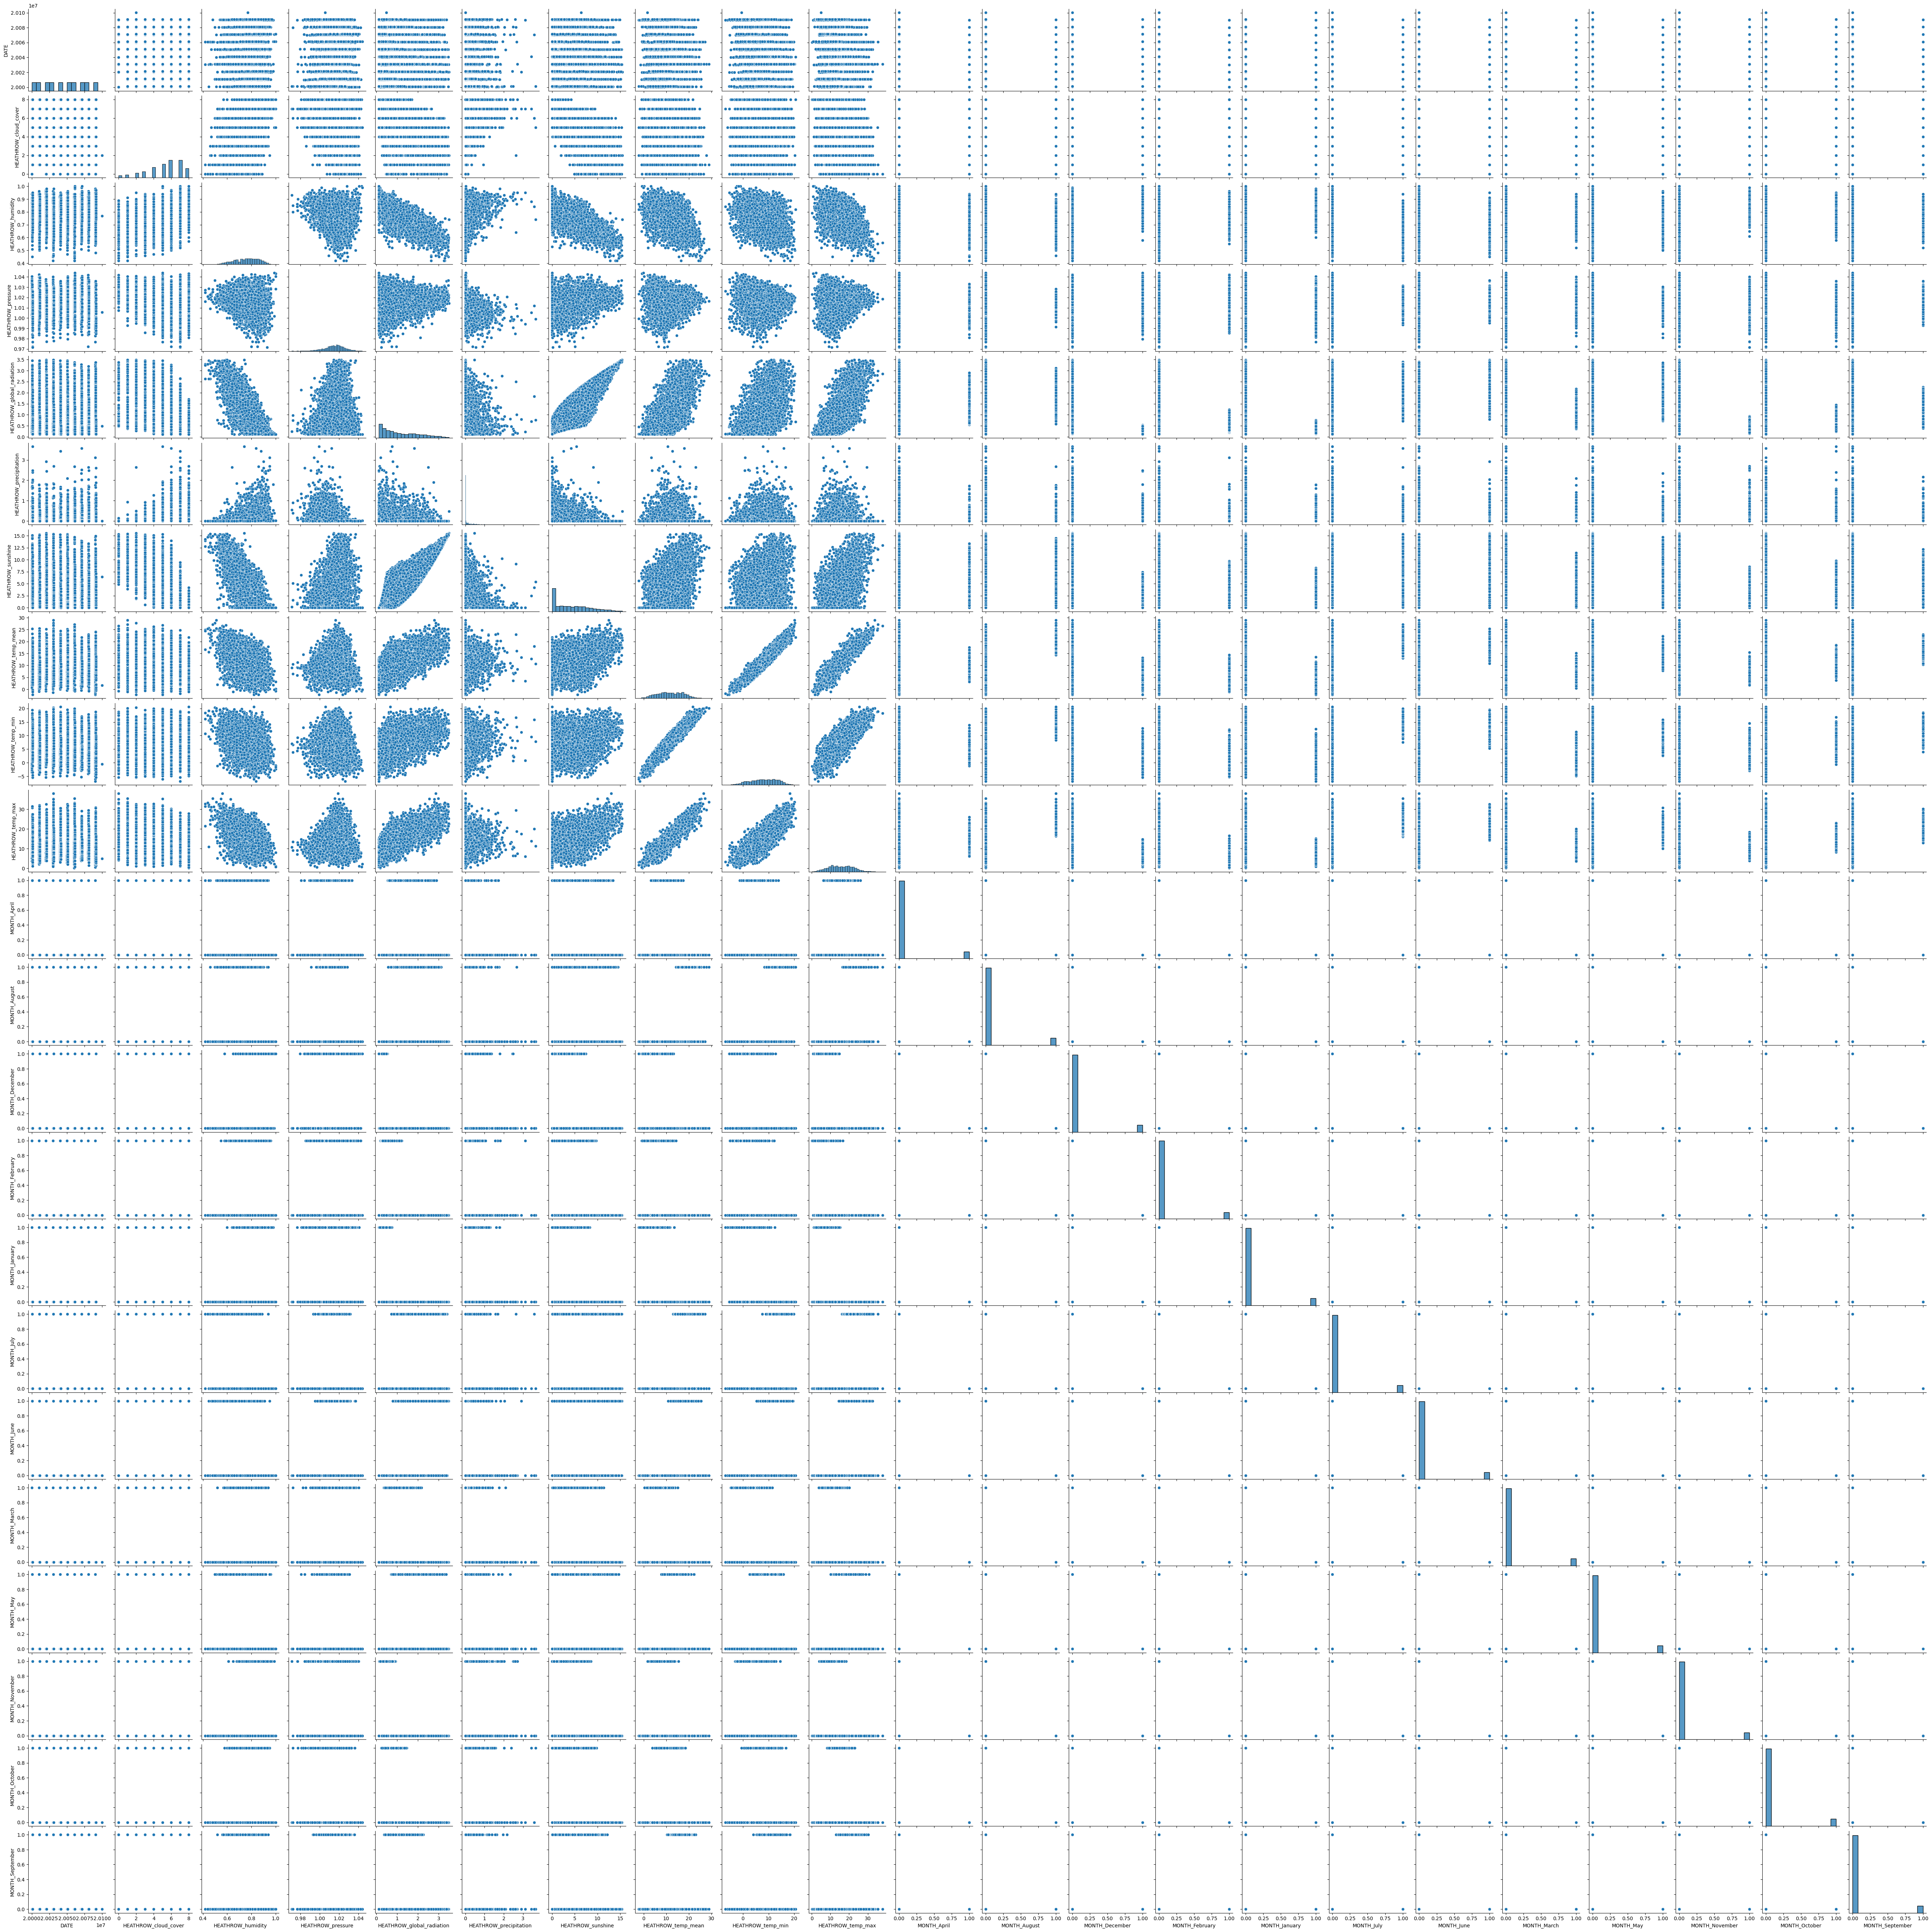

In [159]:
sns.pairplot(df_heathrow)

In [110]:
# define X and y
X = df_heathrow.drop('DATE', axis=1)
y = df_labels['HEATHROW_BBQ_weather']

In [34]:
X.shape

(3654, 11)

#### Train-test split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Modeling

### Basic logistic regression model

In [112]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit to training data
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [140]:
y_train_score = logreg.decision_function(X_train)
y_test_score = logreg.decision_function(X_test)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))



Train AUC: 0.49524039771090755
Test AUC: 0.48319771847951815


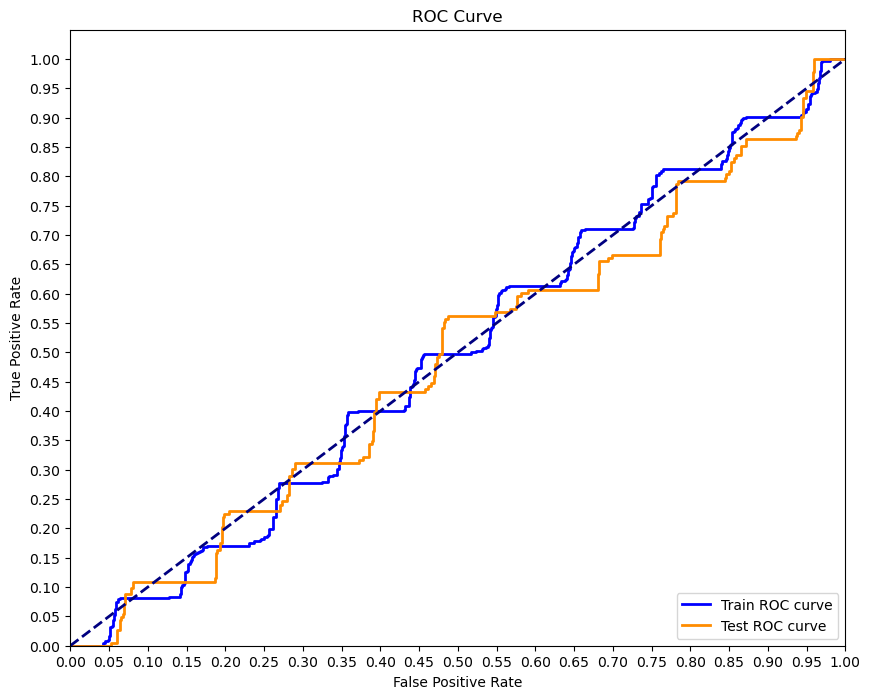

In [142]:
plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Basic decision tree classifier

In [143]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [144]:
y_pred = dt.predict(X_test)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

In [145]:
y_preds = dt.predict(X_test)

In [146]:
classification_report(y_test, y_preds)

'              precision    recall  f1-score   support\n\n       False       1.00      1.00      1.00       548\n        True       1.00      1.00      1.00       183\n\n    accuracy                           1.00       731\n   macro avg       1.00      1.00      1.00       731\nweighted avg       1.00      1.00      1.00       731\n'

In [147]:
acc = accuracy_score(y_test,y_preds) * 100
print('Accuracy is :{0}'.format(acc))

Accuracy is :100.0


In [148]:
cv_score = cross_val_score(dt, X_train, y_train, cv=3)
mean_cv_score = np.mean(cv_score)

print(f"Mean Cross Validation Score: {mean_cv_score :.2%}")

Mean Cross Validation Score: 99.97%


In [155]:
y_pred = dt.predict(X_test)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

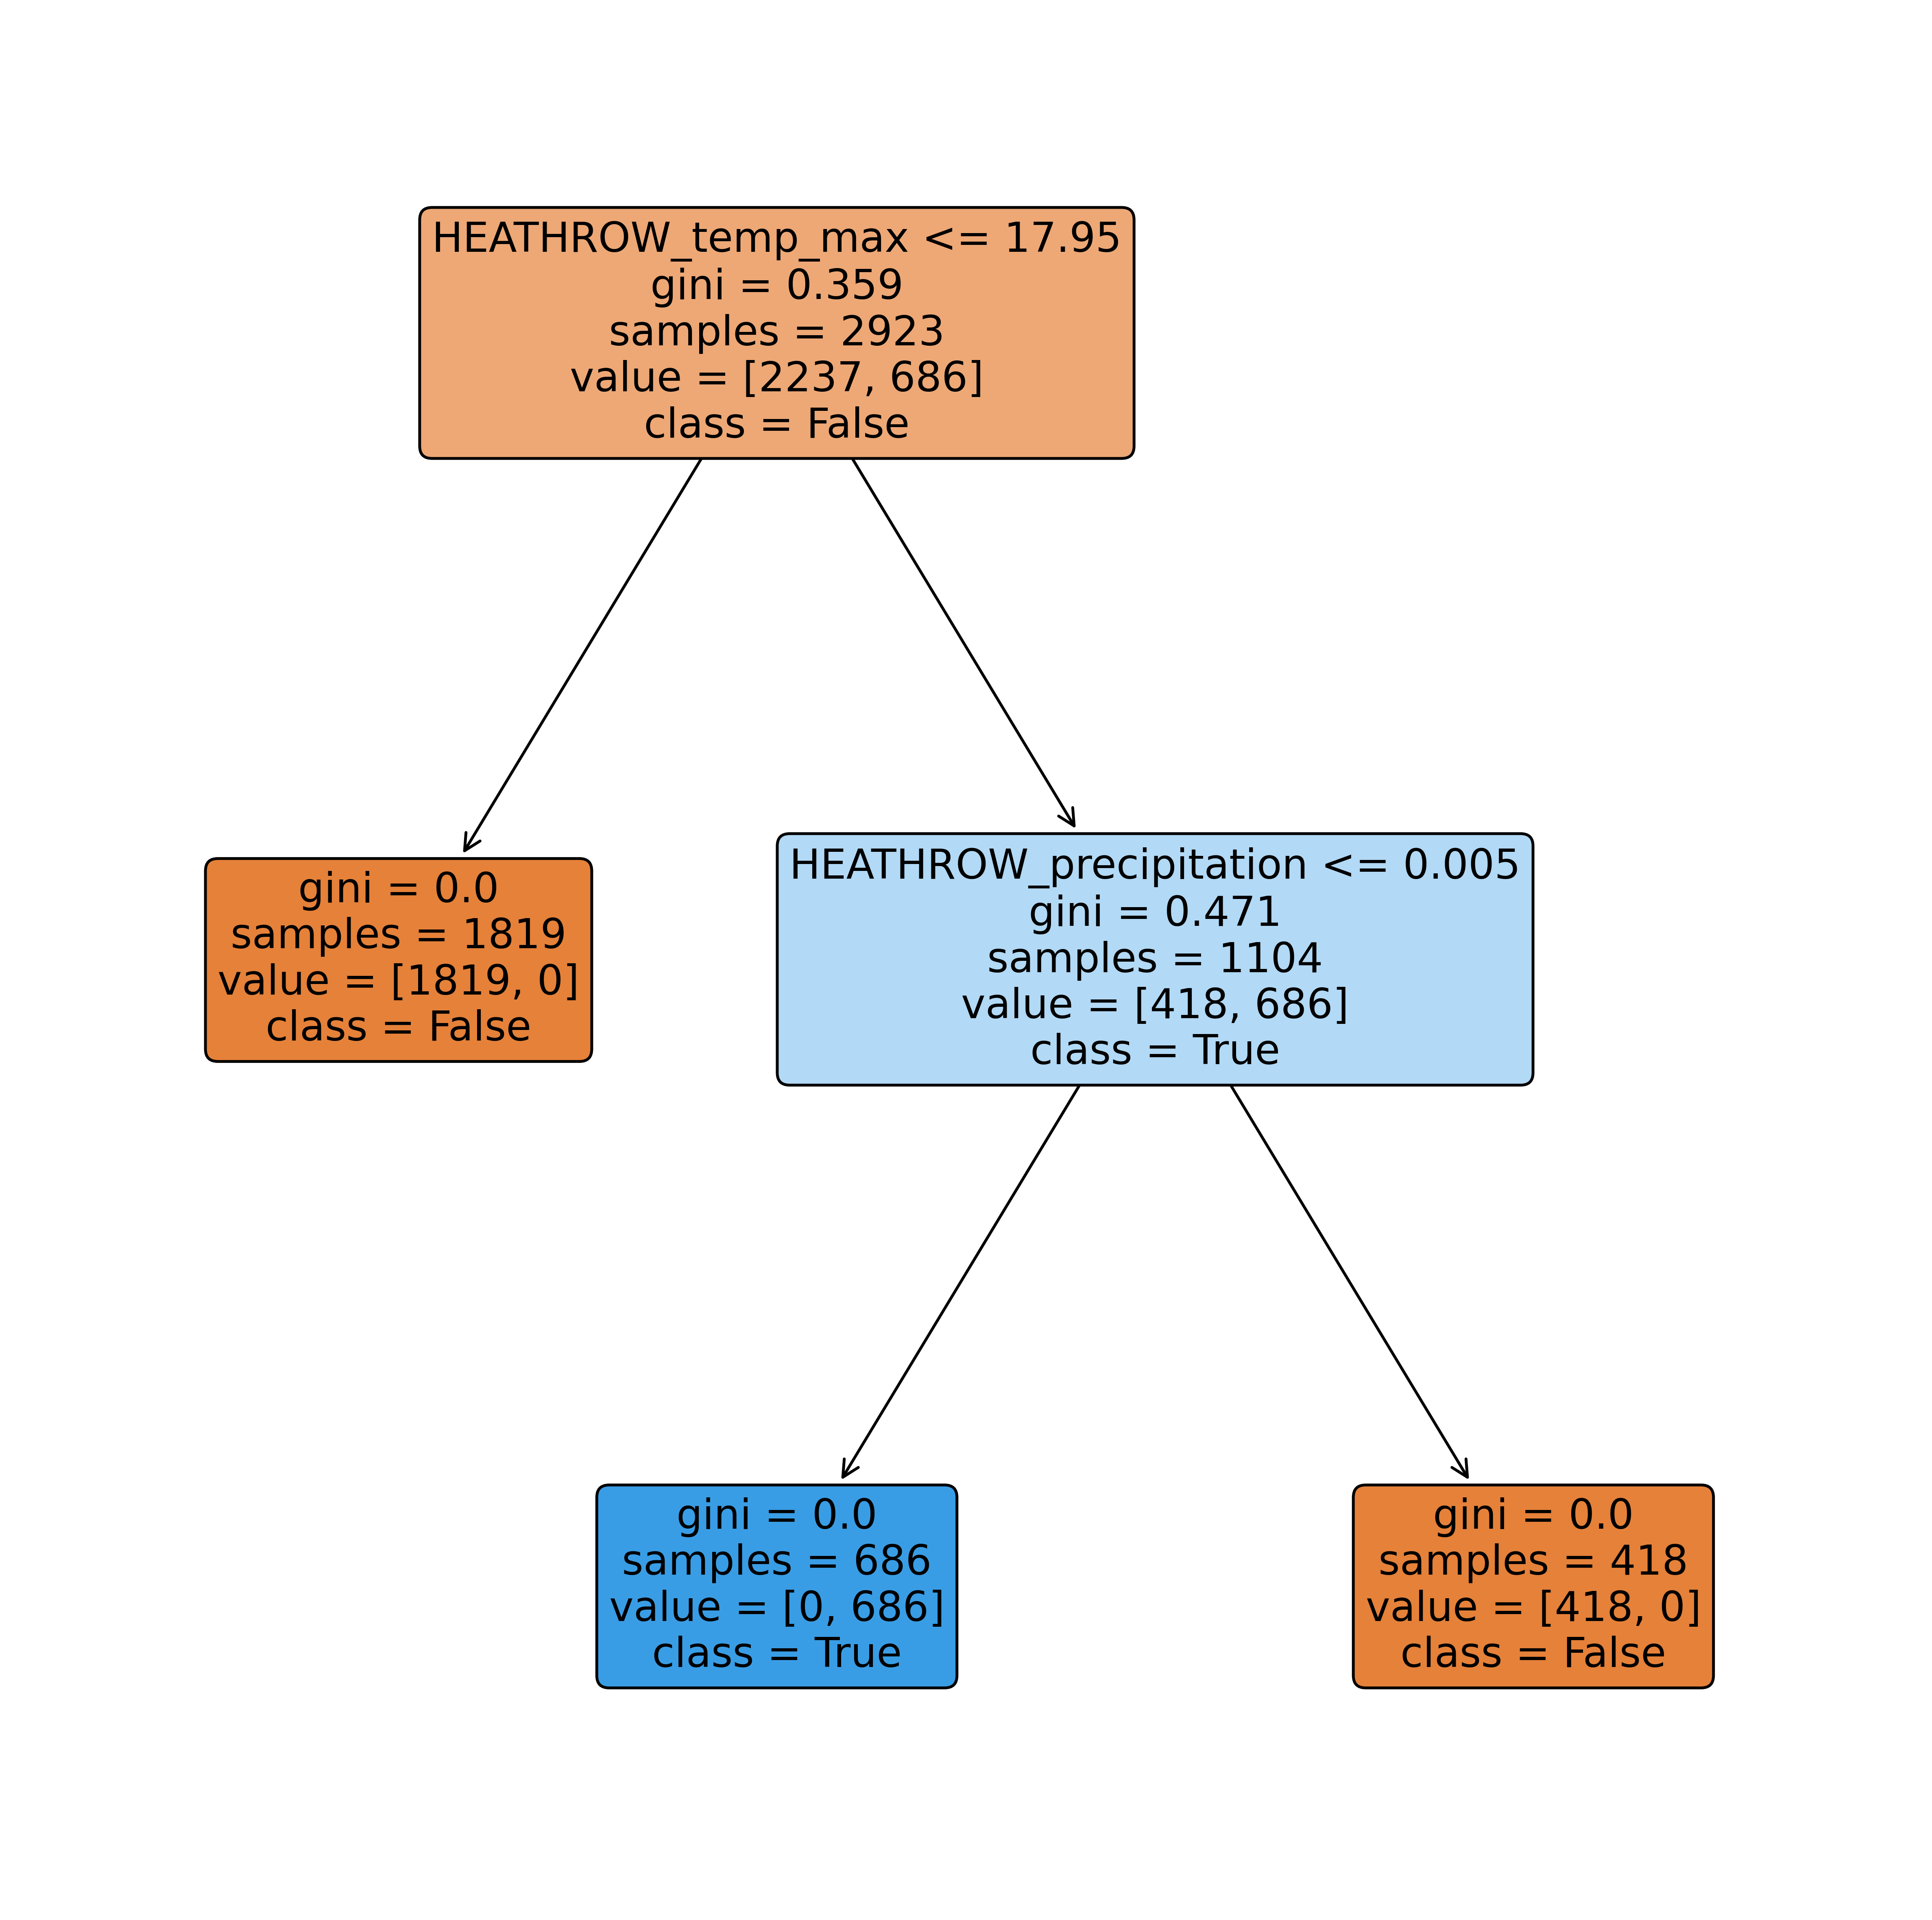

In [149]:
# Plot and show decision tree
plt.figure(figsize=(12,12), dpi=500)
tree.plot_tree(dt, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()


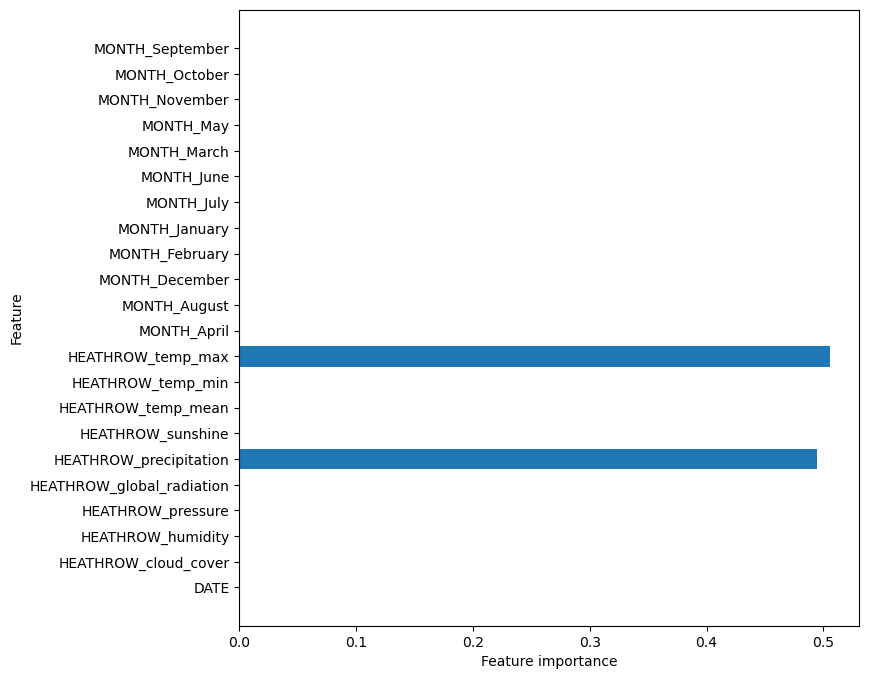

In [150]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(dt)

From this model, it appears ... are the only features that matter

### Random forest classifier

In [121]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [122]:
forest.score(X_train, y_train)

0.9989736572015053

In [123]:
forest.score(X_test, y_test)

0.9972640218878249

In [156]:
y_pred = forest.predict(X_test)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.994535519125683

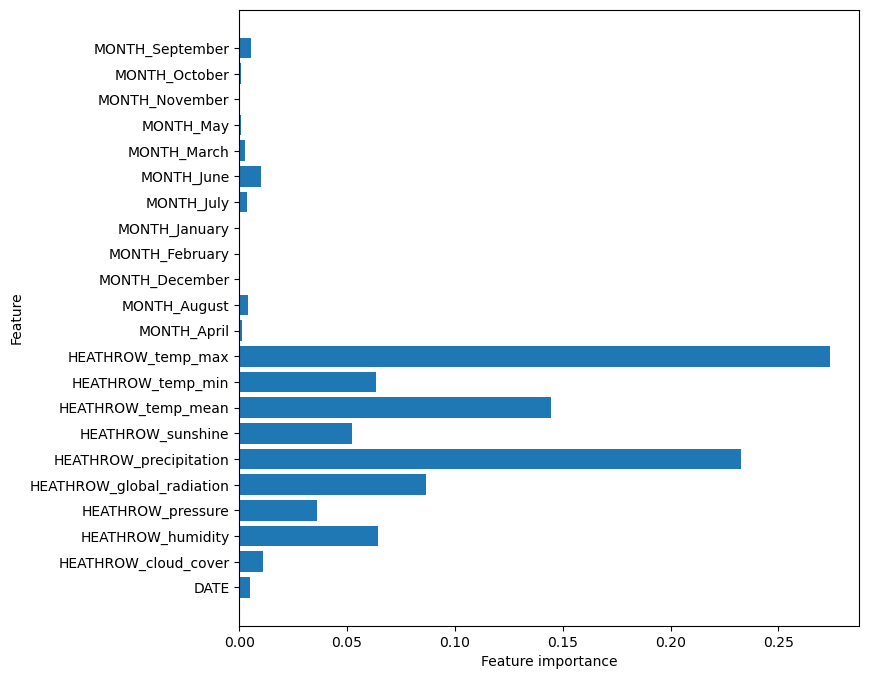

In [124]:
plot_feature_importances(forest)

Other features have importance

### Bagged tree

In [160]:

bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

# Fit to the training data
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [161]:
# Training accuracy score
bagged_tree.score(X_train, y_train)
0.8277231777231777



0.8277231777231777

In [162]:
# Test accuracy score
bagged_tree.score(X_test, y_test)

1.0

In [157]:
y_pred = bagged_tree.predict(X_test)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

### KNN Nearest Neighbors

In [152]:
# data must be scaled
scaler = StandardScaler()

# Transform the training and test sets
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_X_train, columns=df_heathrow.columns)
scaled_df_train.head()

DATE  HEATHROW_cloud_cover  HEATHROW_humidity  HEATHROW_pressure  \
0  0.866247              0.870739           0.798819          -0.752802   
1  1.198968             -0.120564          -0.171650          -2.758235   
2  0.501169             -1.607518          -1.918495           0.019243   
3 -0.525671              0.870739           0.022444          -0.263213   
4  0.876238              0.375088           1.284054           1.214970   

   HEATHROW_global_radiation  HEATHROW_precipitation  HEATHROW_sunshine  \
0                  -0.425281               -0.366392          -1.014606   
1                  -0.504851               -0.204199          -0.712971   
2                   1.291168               -0.474521           1.850919   
3                  -0.766297               -0.474521          -0.134839   
4                  -1.027743               -0.474521          -1.014606   

   HEATHROW_temp_mean  HEATHROW_temp_min  HEATHROW_temp_max  ...  \
0            0.463634           0.845271           0.119255  ...   
1           -0.319709          -0.530019          -0.239577  ...   
2           -0.853807          -1.370474          -0.379990  ...   
3           -0.123874           0.176727          -0.801227  ...   
4           -0.925020          -1.294069          -0.582808  ...   

   MONTH_December  MONTH_February  MONTH_January  MONTH_July  MONTH_June  \
0        -0.30314        -0.28177      -0.315096   -0.298406   -0.301117   
1        -0.30314        -0.28177      -0.315096   -0.298406   -0.301117   
2        -0.30314        -0.28177      -0.315096   -0.298406   -0.301117   
3        -0.30314        -0.28177      -0.315096   -0.298406   -0.301117   
4        -0.30314        -0.28177      -0.315096   -0.298406   -0.301117   

   MONTH_March  MONTH_May  MONTH_November  MONTH_October  MONTH_September  
0    -0.301793  -0.307159       -0.296362      -0.304484        -0.306492  
1     3.313534  -0.307159       -0.296362      -0.304484        -0.306492  
2    -0.301793  -0.307159       -0.296362      -0.304484        -0.306492  
3    -0.301793  -0.307159        3.374254      -0.304484        -0.306492  
4    -0.301793  -0.307159        3.374254      -0.304484        -0.306492  

[5 rows x 22 columns]

In [153]:
knn = KNeighborsClassifier()

# Fit the classifier
knn.fit(scaled_X_train, y_train)

# Predict on the test set
test_preds = knn.predict(scaled_X_test)


C:\Users\lalyn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [131]:
acc = accuracy_score(y_test, test_preds) * 100
print('Accuracy is: {0}'.format(acc))

Accuracy is: 85.63611491108071


In [132]:
f1_score(y_test, test_preds)

0.7025495750708215

In [ ]:
bagged_tree

In [133]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)

C:\Users\lalyn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lalyn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Best Value for k: 7
F1-Score: 0.8111111111111111


C:\Users\lalyn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [158]:
y_pred = knn.predict(X_test)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

C:\Users\lalyn\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\lalyn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.5

# Evaluation

# Conclusion